In [1]:
import pandas as pd
import numpy as np
#import pandas_profiling as pp

# Data preprocessors
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import LabelEncoder


# Model Imports
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor

# trees
from sklearn.ensemble import GradientBoostingClassifier,GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier

#metrics
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_fscore_support as metrics_matrix

# plotting tools
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Neural Network Library imports
import torch

import torch.nn as nn
import torch.functional as f

In [3]:
!nvidia-smi

Tue Jun 11 11:47:51 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.98                 Driver Version: 535.98       CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 3050 ...  WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   59C    P0              16W /  72W |      0MiB /  4096MiB |      1%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [4]:
print(f'Cuda available : {torch.cuda.is_available()}')
print(f'device name : {torch.cuda.get_device_name()} ')

Cuda available : True
device name : NVIDIA GeForce RTX 3050 Laptop GPU 


In [5]:
# loading the Dataset :

Train_Data = pd.read_csv('TrainingData.csv')
Test_Data = pd.read_csv('testX.csv')

# We won't Touch the Train_Data and Test_Data ; but we will copy the data in a new variable for our usage

train_df = Train_Data.copy()
test_df = Test_Data.copy()


C:\Users\pcdpm\AppData\Local\Temp\ipykernel_27868\2539679583.py:3: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  Train_Data = pd.read_csv('TrainingData.csv')
C:\Users\pcdpm\AppData\Local\Temp\ipykernel_27868\2539679583.py:4: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  Test_Data = pd.read_csv('testX.csv')


In [6]:
train_df.info() # Checking the info of the training data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83000 entries, 0 to 82999
Data columns (total 53 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   application_key  83000 non-null  int64  
 1   mvar1            83000 non-null  object 
 2   mvar2            77114 non-null  float64
 3   mvar3            82465 non-null  float64
 4   mvar4            82465 non-null  float64
 5   mvar5            82465 non-null  float64
 6   mvar6            83000 non-null  object 
 7   mvar7            83000 non-null  object 
 8   mvar8            83000 non-null  object 
 9   mvar9            83000 non-null  object 
 10  mvar10           83000 non-null  object 
 11  mvar11           83000 non-null  object 
 12  mvar12           83000 non-null  object 
 13  mvar13           83000 non-null  object 
 14  mvar14           83000 non-null  int64  
 15  mvar15           83000 non-null  object 
 16  mvar16           83000 non-null  object 
 17  mvar17      

In [7]:
str(train_df['mvar1'][1]).isnumeric() 

True

In [8]:
# Preprocessing the Dataset 
# In Every column except column of var-47 all have numerical values ; so other than numerical values are considered as nan

def is_float(x):
    try:
        float(x)
        return True
    except:
        return False

def change_columns(df):

    columns_list = df.columns.values.tolist() # it will output the list of all columns

    for i in columns_list : # Iterate through each column and it will change each column to 'nan' if it is not a number
        if i != 'mvar47':
            df[i] = df[i].apply( lambda x: float(str(x)) if ( isinstance(x,(float,int)) or str(x).isnumeric() or is_float(x) ) else np.nan )
        else:
            df[i] = df[i].apply( lambda x: ['C','L'].index(x) if x in ['C','L'] else np.nan )
    return df

transformed_train_df = change_columns(train_df)
transformed_test_df = change_columns(test_df)

In [9]:
transformed_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83000 entries, 0 to 82999
Data columns (total 53 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   application_key  83000 non-null  float64
 1   mvar1            79267 non-null  float64
 2   mvar2            77114 non-null  float64
 3   mvar3            82465 non-null  float64
 4   mvar4            82465 non-null  float64
 5   mvar5            82465 non-null  float64
 6   mvar6            63299 non-null  float64
 7   mvar7            75326 non-null  float64
 8   mvar8            63291 non-null  float64
 9   mvar9            71318 non-null  float64
 10  mvar10           82465 non-null  float64
 11  mvar11           36283 non-null  float64
 12  mvar12           68422 non-null  float64
 13  mvar13           73311 non-null  float64
 14  mvar14           83000 non-null  float64
 15  mvar15           49481 non-null  float64
 16  mvar16           63757 non-null  float64
 17  mvar17      

In [10]:
transformed_train_df # to have a look
transformed_train_df['mvar40'].isnull().sum()

65070

In [11]:
null_vals = np.array(list( [i,transformed_train_df[i].isnull().sum()] for i in transformed_train_df.columns if transformed_train_df[i].isnull().sum() > 20000))
print(null_vals)
transformed_train_df.isna().sum() 

[['mvar11' '46717']
 ['mvar15' '33519']
 ['mvar21' '23462']
 ['mvar22' '30668']
 ['mvar23' '42311']
 ['mvar30' '37988']
 ['mvar31' '58539']
 ['mvar35' '34868']
 ['mvar40' '65070']
 ['mvar41' '57264']
 ['mvar45' '45920']
 ['mvar46' '23603']]


application_key        0
mvar1               3733
mvar2               5886
mvar3                535
mvar4                535
mvar5                535
mvar6              19701
mvar7               7674
mvar8              19709
mvar9              11682
mvar10               535
mvar11             46717
mvar12             14578
mvar13              9689
mvar14                 0
mvar15             33519
mvar16             19243
mvar17             16499
mvar18             15359
mvar19                 5
mvar20               535
mvar21             23462
mvar22             30668
mvar23             42311
mvar24             19530
mvar25              7862
mvar26             10929
mvar27             13650
mvar28               535
mvar29               535
mvar30             37988
mvar31             58539
mvar32              7862
mvar33              1869
mvar34               535
mvar35             34868
mvar36              3159
mvar37              7862
mvar38               535
mvar39              6329


In [12]:
transformed_train_df[ ( transformed_train_df['mvar1'].isna() & transformed_train_df['mvar50'].isna() )  ]

,application_key,mvar1,mvar2,mvar3,mvar4,mvar5,mvar6,mvar7,mvar8,mvar9,...,mvar43,mvar44,mvar45,mvar46,mvar47,mvar48,mvar49,mvar50,mvar51,default_ind
7,230039.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,2.0,615.0,NaN,NaN,0.0
29,230061.0,NaN,2.0457,4.514,0.0,0.0,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,1,89.0,447.0,NaN,NaN,0.0
45,230077.0,NaN,0.3880,2.031,0.0,0.0,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,0,5.0,676.0,NaN,NaN,1.0
48,230080.0,NaN,0.0000,0.000,0.0,0.0,NaN,NaN,NaN,494.0,...,0.0,NaN,NaN,0.0,0,111.0,407.0,NaN,NaN,0.0
50,230082.0,NaN,0.0000,0.000,0.0,0.0,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,0,11.0,452.0,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82762,577831.0,NaN,NaN,6.326,0.0,0.0,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,0,3.0,623.0,NaN,NaN,1.0
82784,577853.0,NaN,0.0634,0.000,0.0,0.0,NaN,NaN,NaN,NaN,...,0.0,NaN,0.0,0.0,0,3247.0,562.0,NaN,NaN,0.0
82822,577891.0,NaN,0.9684,0.000,0.0,0.0,14.0,14.0,14.0,297.0,...,1.0,1.0,NaN,NaN,0,732.0,655.0,NaN,NaN,1.0
82824,577893.0,NaN,0.2668,15.285,0.0,0.0,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,0,3247.0,743.0,NaN,NaN,1.0


In [13]:
transformed_train_df[ transformed_train_df['mvar11'] == 0.0 ]

,application_key,mvar1,mvar2,mvar3,mvar4,mvar5,mvar6,mvar7,mvar8,mvar9,...,mvar43,mvar44,mvar45,mvar46,mvar47,mvar48,mvar49,mvar50,mvar51,default_ind
555,230587.0,1837.0,2.2015,0.000,0.0,0.0,1195.0,14685.0,14685.0,NaN,...,2.0,0.38135,NaN,0.0,0,27.0,738.0,5.0,3690.0,0.0
1051,231083.0,1794.0,0.1160,0.000,0.0,0.0,496.0,10626.0,3434.0,13646.0,...,13.0,0.93965,NaN,0.0,1,10.0,795.0,4.0,3180.0,0.0
1622,231654.0,1794.0,2.2076,0.000,0.0,0.0,141.0,4955.0,3469.0,16500.0,...,15.0,0.61166,0.0,0.0,1,27.0,726.0,4.0,2904.0,0.0
2081,232113.0,1749.0,0.4185,0.000,0.0,0.0,237.0,3181.0,1487.0,10257.0,...,11.0,0.71893,NaN,0.0,0,14.0,440.0,4.0,1760.0,1.0
2743,232775.0,1669.0,0.5876,0.000,0.0,0.0,NaN,305.0,NaN,NaN,...,2.0,1.00000,NaN,0.0,0,3247.0,432.0,4.0,1728.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78447,573516.0,1779.0,0.1752,0.000,0.0,0.0,7433.0,9107.0,9107.0,28232.0,...,2.0,1.00000,NaN,NaN,0,18.0,829.0,4.0,3316.0,0.0
78897,573966.0,1754.0,3.7115,0.258,0.0,0.0,269.0,781.0,269.0,743.0,...,4.0,0.76023,NaN,0.0,0,2.0,835.0,4.0,3340.0,1.0
78966,574035.0,1710.0,0.6139,4.253,0.0,0.0,NaN,35711.0,NaN,16946.0,...,1.0,0.93160,0.0,0.0,0,25.0,803.0,4.0,3212.0,0.0
81661,576730.0,1667.0,0.7904,0.000,0.0,0.0,15.0,45.0,15.0,793.0,...,2.0,0.96247,NaN,NaN,0,9.0,622.0,4.0,2488.0,1.0


In [14]:
train_df1 = transformed_train_df.drop(null_vals[:,0], inplace = False,axis = 1) # Dropping all columns with more than 20k null vals
len(train_df1[~train_df1.isnull().any(axis=1)]) # atlast we got 52k rows without any null vals

52617

In [15]:
print(transformed_train_df['default_ind'].value_counts())
# train_There are 59k non-defaulters and 23k defaulters in the original dataset
train_df1[~train_df1.isnull().any(axis=1)]['default_ind'].value_counts() 
# There are 39k non-defaulters and 13k defaulters in the new dataset

0.0    59145
1.0    23855
Name: default_ind, dtype: int64


0.0    39696
1.0    12921
Name: default_ind, dtype: int64

In [16]:
null_filtered_train_df1 = train_df1[~train_df1.isnull().any(axis=1)]
null_filtered_train_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52617 entries, 0 to 82999
Data columns (total 41 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   application_key  52617 non-null  float64
 1   mvar1            52617 non-null  float64
 2   mvar2            52617 non-null  float64
 3   mvar3            52617 non-null  float64
 4   mvar4            52617 non-null  float64
 5   mvar5            52617 non-null  float64
 6   mvar6            52617 non-null  float64
 7   mvar7            52617 non-null  float64
 8   mvar8            52617 non-null  float64
 9   mvar9            52617 non-null  float64
 10  mvar10           52617 non-null  float64
 11  mvar12           52617 non-null  float64
 12  mvar13           52617 non-null  float64
 13  mvar14           52617 non-null  float64
 14  mvar16           52617 non-null  float64
 15  mvar17           52617 non-null  float64
 16  mvar18           52617 non-null  float64
 17  mvar19      

<AxesSubplot:>

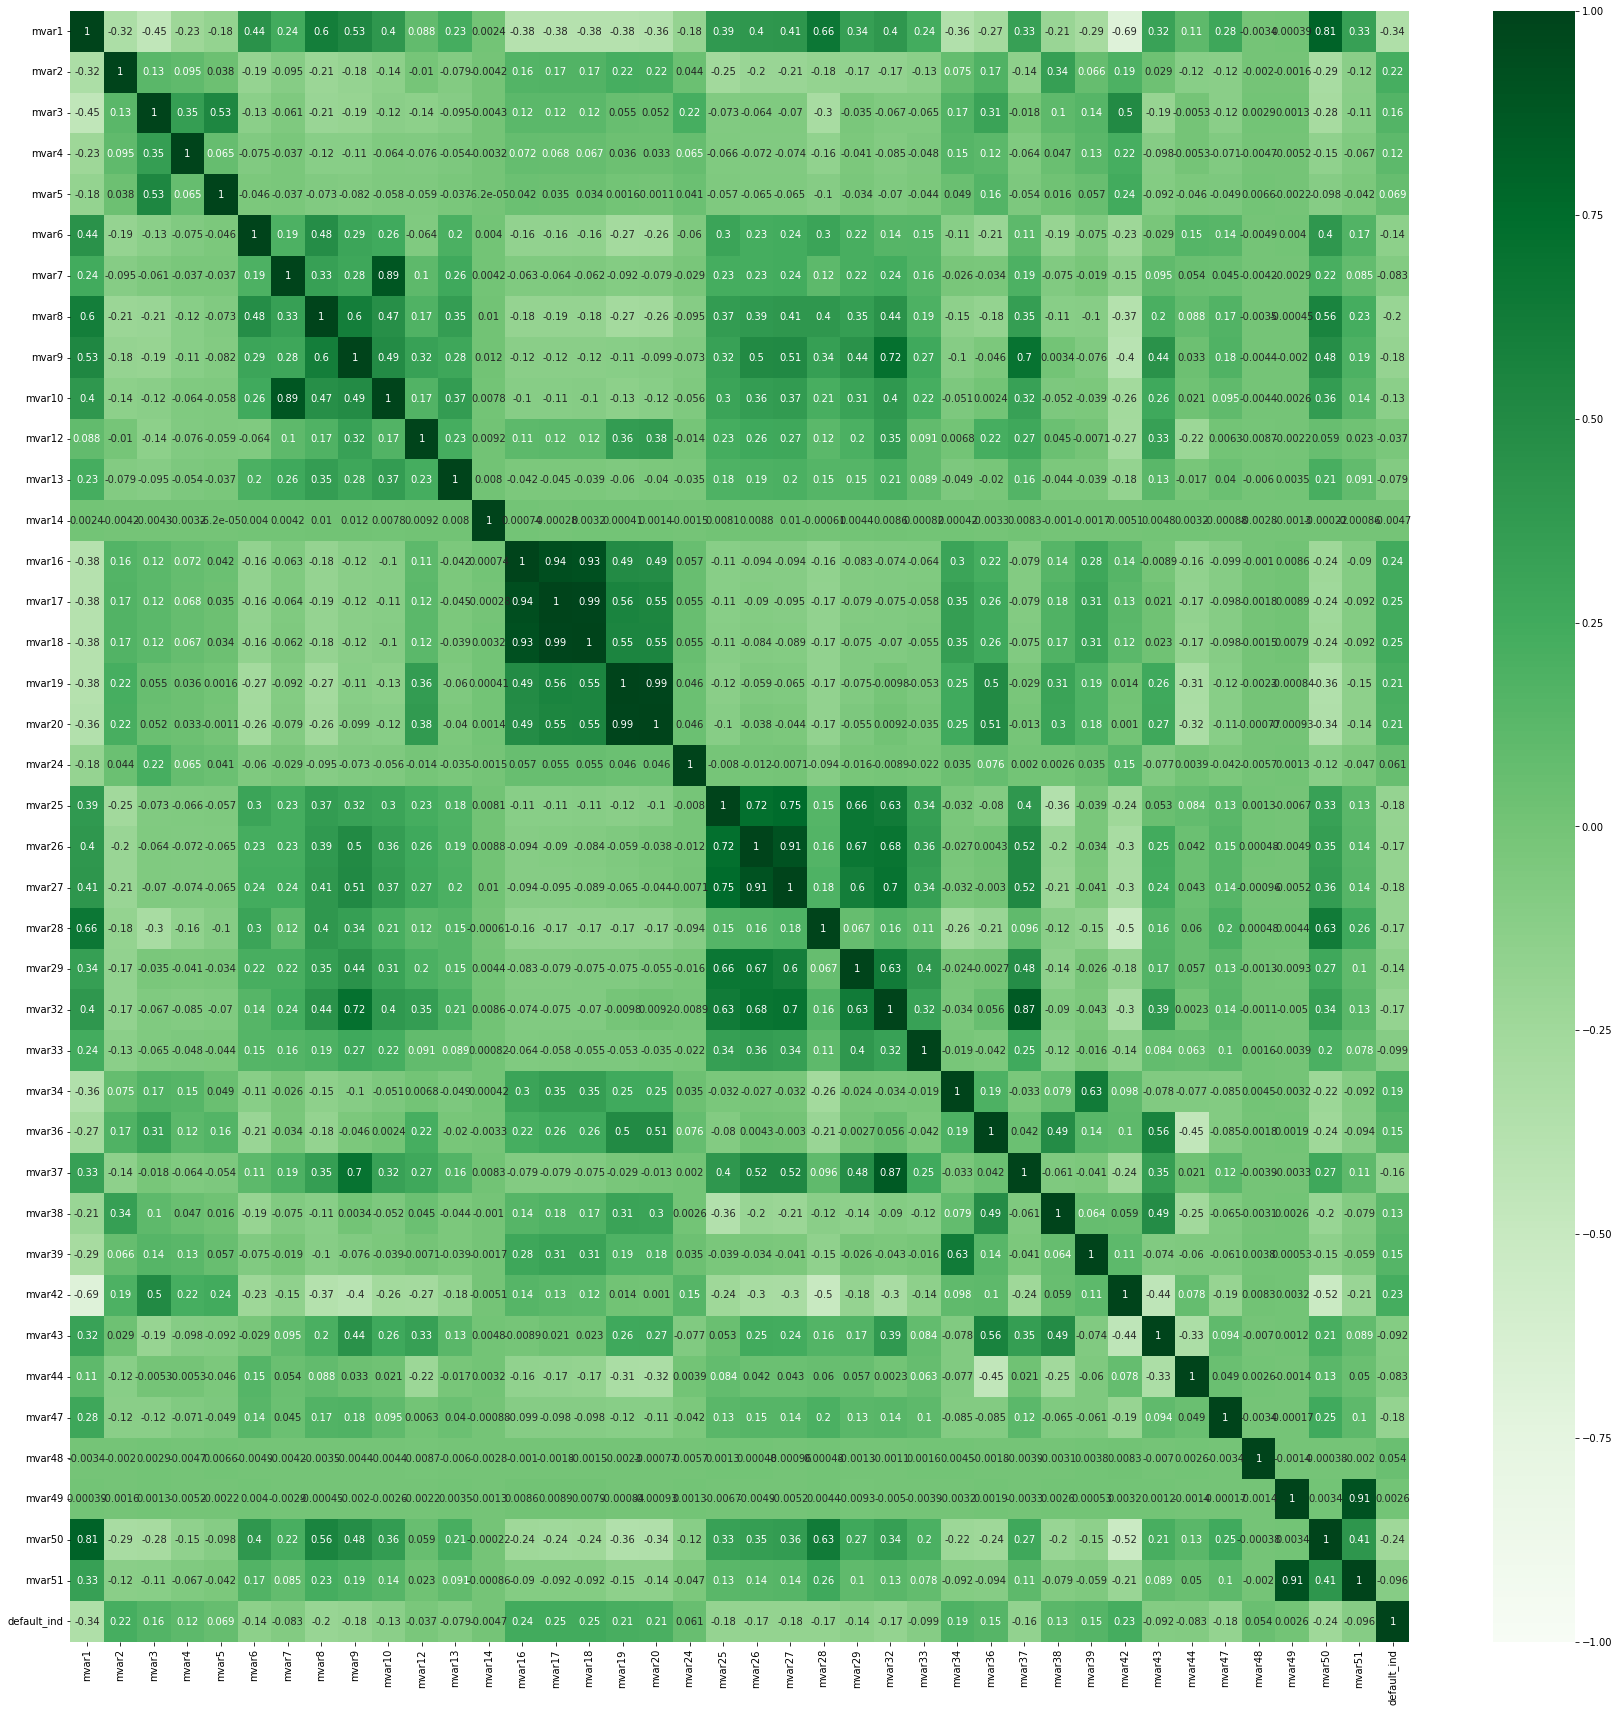

In [17]:
# Performance is not so good , so we are going to check the corr matrix
plt.figure(1,figsize=(30,30))
sns.heatmap(null_filtered_train_df1.drop(['application_key'],axis=1,inplace=False).corr() ,cmap='Greens',annot=True, vmax=1,vmin=-1)

,application_key,mvar1,mvar2,mvar3,mvar4,mvar5,mvar6,mvar7,mvar8,mvar9,...,mvar39,mvar42,mvar43,mvar44,mvar47,mvar48,mvar49,mvar50,mvar51,default_ind
1736,231768.0,NaN,0.0901,0.870,0.0000,0.000,NaN,NaN,NaN,NaN,...,NaN,0.85714,0.0,NaN,0,2.0,429.0,NaN,NaN,1.0
3919,233951.0,1651.0,3.0879,12.862,0.0000,0.000,NaN,NaN,NaN,1090.0,...,NaN,0.72222,1.0,NaN,0,9.0,484.0,4.0,1936.0,1.0
20186,250218.0,1731.0,0.0968,0.000,0.0000,0.000,0.0,267.0,267.0,5188.0,...,0.0,0.00000,6.0,0.30634,0,9.0,778.0,4.0,3112.0,1.0
26629,256661.0,1880.0,NaN,0.000,0.0000,0.000,1983.0,2898.0,2898.0,9911.0,...,0.0,0.00000,2.0,1.00000,1,89.0,382.0,5.0,1910.0,0.0
35451,265483.0,1917.0,0.1378,0.000,0.0000,0.000,4618.0,46075.0,4618.0,11198.0,...,0.0,0.00000,11.0,0.38399,1,5.0,758.0,5.0,3790.0,0.0
39878,269910.0,1590.0,0.2876,23.995,7.3190,0.000,NaN,NaN,NaN,2826.0,...,0.0,0.72222,0.0,NaN,0,11.0,460.0,4.0,1840.0,0.0
41075,271107.0,1742.0,0.2932,0.408,0.0000,0.000,22.0,4638.0,517.0,64497.0,...,0.0,0.17241,9.0,0.81221,0,89.0,442.0,4.0,1768.0,0.0
43051,273083.0,1685.0,0.5530,3.092,0.0000,0.000,NaN,0.0,NaN,NaN,...,0.0,1.00000,1.0,1.00000,1,3247.0,540.0,4.0,2160.0,0.0
44085,274117.0,1646.0,0.5537,8.734,0.0000,0.000,37.0,3270.0,127.0,5967.0,...,1.0,0.33333,2.0,0.49139,0,11.0,496.0,4.0,1984.0,1.0
44606,274638.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,8.0,565.0,NaN,NaN,1.0


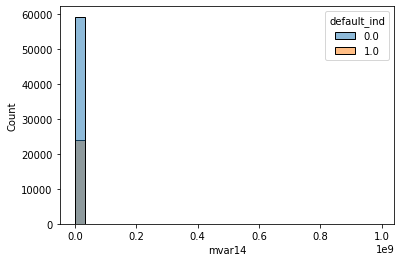

In [75]:
def make_histplot(df):
    columns_list = df.columns

    for i in columns_list:
        sns.histplot(data=df,x=i,hue='default_ind',bins=100)

#make_histplot(train_df1)

sns.histplot(data=train_df1,x='mvar14',hue='default_ind',bins=30)
max( train_df1['mvar14'] )
train_df1[ train_df1['mvar14'] > 1e8 ]

In [18]:
def fill_columns(df2=train_df1,df1=null_filtered_train_df1,m1=KNeighborsClassifier(n_neighbors=15,weights='distance'),m2=KNeighborsRegressor(n_neighbors=15,weights='distance'),y_type=['R','C','R'],df_test=transformed_test_df):
    
    df_train = df1.drop(['application_key','default_ind'] , axis=1, inplace=False) # train dataset will be used for raining the model
    col_list = df_train.columns.values.tolist() # getting all the columns as a list

    df_predict = df2.drop(['application_key','default_ind'] , axis=1, inplace=False) # prediction dataset

    df_target = df2.copy() # In this df we will fill the columns with null vals with the predicted values

    for i,col in enumerate(col_list):

        model = m1 if y_type[i] == 'C' else m2
        
        df_train_col = df_train.drop([col], axis=1, inplace=False)
        y_train_col = df_train[col] # For training the model

        df_predict_col = df_predict[df_predict[col].isnull()].drop([col] , axis=1 , inplace = False)

        if len(df_predict_col) != 0 : # We need to predict only if the null vals are there

            df_predict_col = df_predict_col.fillna(df_predict_col.median() , inplace=False) # In the prediction dataset , if any other columns have nan vals , they will be filled with median vals
            null_col_list =  df_predict_col.columns[df_predict_col.isna().any()].tolist()

            if len(null_col_list) != 0: # For removing col containing only Nan vals
                df_predict_col = df_predict_col.drop(null_col_list , axis=1 , inplace=False)
                df_train_col = df_train_col.drop(null_col_list , axis=1 , inplace=False)
            
            # Model training :
            model.fit(df_train_col, y_train_col)
            Y_pred = model.predict(df_predict_col)

            df_target.loc[df_target[col].isna(),col] = Y_pred
            #print(Y_pred)
            #break
    
    return df_target


In [19]:
df_filled_knn = fill_columns( y_type= ['R'] * ( len(null_filtered_train_df1.columns.values.tolist()) - 2 )  )

In [20]:
df_filled_knn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83000 entries, 0 to 82999
Data columns (total 41 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   application_key  83000 non-null  float64
 1   mvar1            83000 non-null  float64
 2   mvar2            83000 non-null  float64
 3   mvar3            83000 non-null  float64
 4   mvar4            83000 non-null  float64
 5   mvar5            83000 non-null  float64
 6   mvar6            83000 non-null  float64
 7   mvar7            83000 non-null  float64
 8   mvar8            83000 non-null  float64
 9   mvar9            83000 non-null  float64
 10  mvar10           83000 non-null  float64
 11  mvar12           83000 non-null  float64
 12  mvar13           83000 non-null  float64
 13  mvar14           83000 non-null  float64
 14  mvar16           83000 non-null  float64
 15  mvar17           83000 non-null  float64
 16  mvar18           83000 non-null  float64
 17  mvar19      

In [43]:
df_filled_knn.mean()

application_key    318146.931060
mvar1                1744.230996
mvar2                   1.030175
mvar3                   5.382222
mvar4                   0.459304
mvar5                   1.078861
mvar6                1311.947578
mvar7               15986.849783
mvar8                5374.420562
mvar9               29669.964258
mvar10              30254.334725
mvar12               5943.012983
mvar13              14243.683996
mvar14             189484.122530
mvar16                  0.244150
mvar17                  0.275449
mvar18                  0.280237
mvar19                  0.915205
mvar20                  1.003510
mvar24                 85.335485
mvar25               1657.475236
mvar26               3082.609301
mvar27               2803.386271
mvar28               8825.210134
mvar29               5526.706344
mvar32                434.397270
mvar33                  6.957186
mvar34                  0.226954
mvar36                  6.291787
mvar37                  3.987962
mvar38    

In [44]:
transformed_train_df.mean()

application_key    318146.931060
mvar1                1747.511865
mvar2                   1.054816
mvar3                   5.401784
mvar4                   0.461151
mvar5                   1.084012
mvar6                1633.429280
mvar7               17507.974126
mvar8                6822.332227
mvar9               34030.596329
mvar10              30228.574656
mvar11               5563.994846
mvar12               6975.314709
mvar13              15495.258133
mvar14             189484.122530
mvar15             291490.231604
mvar16                  0.217686
mvar17                  0.251906
mvar18                  0.257669
mvar19                  0.915188
mvar20                  0.998508
mvar21                 57.302429
mvar22               4347.490308
mvar23               4241.010319
mvar24                 70.640478
mvar25               1770.227688
mvar26               3397.254166
mvar27               3124.324441
mvar28               8810.980464
mvar29               5524.663639
mvar30    

In [ ]:
# processed leave request